In [0]:
import json
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
# vocab_size = 10000
# embedding_dim = 16
# max_length = 32
# trunc_type = 'post'
# padding_type = 'post'
# oov_tok = '<OOV>'
# training_size = 20000

# vocab_size = 1000
# embedding_dim = 16
# max_length = 16
# trunc_type = 'post'
# padding_type = 'post'
# oov_tok = '<OOV>'
# training_size = 20000

vocab_size = 1000
embedding_dim = 32
max_length = 16
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [52]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json -O /tmp/sarcasm.json

--2020-05-04 10:52:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2020-05-04 10:52:55 (131 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:

with open('/tmp/sarcasm.json','r') as f:
    datastore = json.load(f)

In [0]:
sentences= []
labels = []
urls = []

In [0]:

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [0]:
training_sentences = sentences[0: training_size]
testing_sentences = sentences[training_size: ]
training_labels = labels[0: training_size]
testing_labels = labels[training_size: ]


training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)


In [0]:
tokenizer = Tokenizer(num_words= vocab_size, oov_token= '<OOV>')
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [0]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

In [59]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 16, 32)            32000     
_________________________________________________________________
global_average_pooling1d_9 ( (None, 32)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 24)                792       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 25        
Total params: 32,817
Trainable params: 32,817
Non-trainable params: 0
_________________________________________________________________


In [60]:
num_epochs = 30

history = model.fit(training_padded, training_labels, epochs= num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/30
625/625 [==============================] - 2s 4ms/step - loss: 0.5000 - accuracy: 0.7535 - val_loss: 0.4033 - val_accuracy: 0.8141
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 0.3753 - accuracy: 0.8283 - val_loss: 0.3981 - val_accuracy: 0.8107
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 0.3624 - accuracy: 0.8360 - val_loss: 0.4024 - val_accuracy: 0.8086
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 0.3590 - accuracy: 0.8374 - val_loss: 0.4011 - val_accuracy: 0.8143
Epoch 5/30
625/625 [==============================] - 2s 3ms/step - loss: 0.3561 - accuracy: 0.8372 - val_loss: 0.4054 - val_accuracy: 0.8131
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 0.3540 - accuracy: 0.8378 - val_loss: 0.4013 - val_accuracy: 0.8147
Epoch 7/30
625/625 [==============================] - 2s 3ms/step - loss: 0.3503 - accuracy: 0.8412 - val_loss: 0.4029 - val_accuracy: 0.8177
Epoch 

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

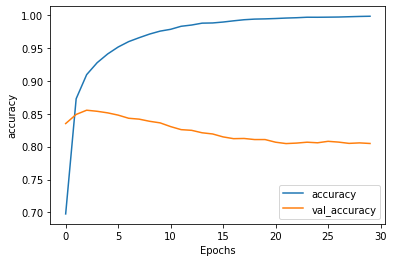

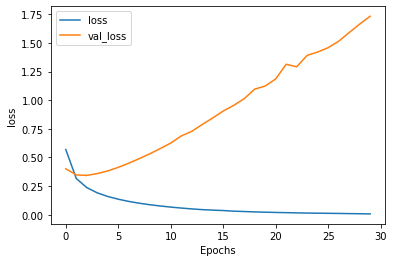

In [34]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

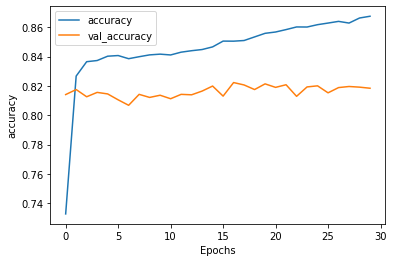

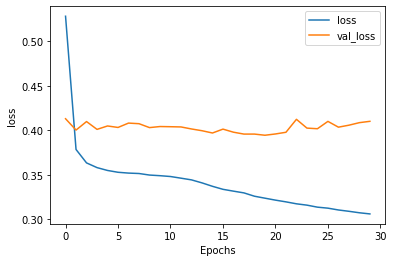

In [50]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

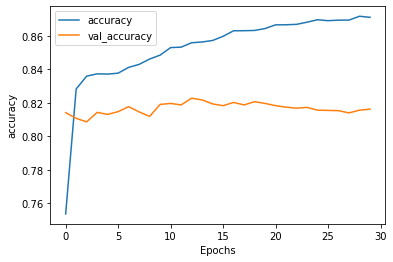

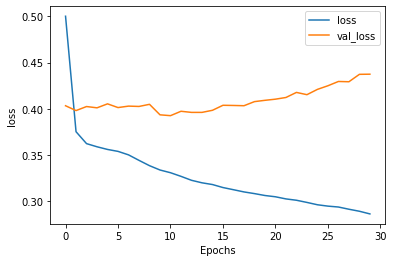

In [62]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

**de nada!***